In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data.reset_index(drop = True,inplace = True)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1,137.93,219.498876


In [5]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [6]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1,137.93,219.498876,1.0


In [7]:
x1 = []
x2 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格']].values)
    x2.append(data.loc[i:(i+4)][['论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [8]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],1)
x2.shape

(2430, 5, 1)

In [9]:
x1_train = x1[:1944]
x2_train = x2[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
x2_test  = x2[1944:]
y_test  = y[1944:]

In [10]:
from sklearn import metrics

MSE = 0
RMSE = 0
MAE = 0
MAPE = 0
df = pd.DataFrame(y_test,columns=['truth'])

for i in range(5):
    from keras.models import Sequential
    from keras.layers import Input, Dense, LSTM, concatenate, multiply
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.models import Model

    model1 = Sequential()
    input1 = Input(shape=(5,1))
    model1 = Dense(200, activation='relu')(input1)
    model1 = LSTM(units=200)(model1)
    model1 = (Dense(2000, activation="relu"))(model1)
    model1 = (Dense(200, activation="relu"))(model1)

    model2 = Sequential()
    input2 = Input(shape=(5,1))
    model2 = Dense(200, activation='relu')(input2)
    model2 = LSTM(units=200)(model2)
    model2 = (Dense(2000, activation="relu"))(model2)
    model2 = (Dense(200, activation="relu"))(model2)

    conc = multiply([model1, model2])

    conc2 = (Dense(20, activation="relu"))(conc)
    out = (Dense(1, activation="linear"))(conc2)
    model = Model([input1, input2], out)
    model.summary()

    from keras.optimizers import Adam
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss = 'mean_squared_error')
    model.fit([x1_train,x2_train],y_train,
                epochs=300,
                batch_size=256,
                validation_data=([x1_test,x2_test], y_test),
                verbose=1)

    pred = model.predict([x1_test,x2_test])
    pred = pred.ravel()
    df0 = pd.DataFrame(pred,columns=['pred'])
    df = pd.concat([df, df0], axis=1)
    MSE = MSE + metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
    RMSE = RMSE + np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
    MAE = MAE + np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
    MAPE = MAPE + np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))

MSE = MSE/5
RMSE = RMSE/5
MAE = MAE/5
MAPE = MAPE/5

print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 5, 200)            │             400 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 200)               │         320,800 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ (None, 200)               │         320,800 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 2000)              │         402,000 │ lstm[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 2000)              │         402,000 │ lstm_1[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 200)               │         400,200 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 200)               │         400,200 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 200)               │               0 │ dense_2[0][0],             │
│                               │                           │                 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 20)                │           4,020 │ multiply[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │              21 │ dense_6[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,250,841 (8.59 MB)

 Trainable params: 2,250,841 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 32.6506 - val_loss: 37.4802
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 32.3923 - val_loss: 36.9294
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 31.6177 - val_loss: 35.0824
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 28.7605 - val_loss: 29.2891
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 20.5009 - val_loss: 15.6830
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.7920 - val_loss: 12.1789
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4944 - val_loss: 11.7446
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.9927 - val_loss: 10.8764
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.1195 - val_loss: 9.3015
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.0844 - val_loss: 8.9848
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.3192 - val_loss: 8.5890
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0038 - val_loss: 0.0201
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0036 - val_loss: 0.0195
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0035 - val_loss: 0.0187
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0037 - val_loss: 0.0159
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0036 - val_loss: 0.0164
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0034 - val_loss: 0.0196
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0033 - val_loss: 0.0220
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0032 - val_loss: 0.0225
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0032 - val_loss: 0.0189
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0030 - val_loss: 0.0158
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0031 - val_loss: 0.0145
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0031 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.6944e-04 - val_loss: 4.4588e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 1.6427e-04 - val_loss: 5.1893e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.5909e-04 - val_loss: 5.4111e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.5896e-04 - val_loss: 4.7999e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.5960e-04 - val_loss: 5.6230e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.6491e-04 - val_loss: 4.4756e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 1.6544e-04 - val_loss: 5.7139e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 1.7126e-04 - val_loss: 5.6487e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 1.7150e-04 - val_loss: 6.1262e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.8040e-04 - val_loss: 4.4920e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 1.6833e-04 - v

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_3 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ (None, 200)               │         320,800 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_3 (LSTM)                 │ (None, 200)               │         320,800 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 2000)              │         402,000 │ lstm_2[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 2000)              │         402,000 │ lstm_3[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 200)               │         400,200 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 200)               │         400,200 │ dense_12[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_1 (Multiply)         │ (None, 200)               │               0 │ dense_10[0][0],            │
│                               │                           │                 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 20)                │           4,020 │ multiply_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 1)                 │              21 │ dense_14[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,250,841 (8.59 MB)

 Trainable params: 2,250,841 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 32.6501 - val_loss: 37.4327
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 32.4052 - val_loss: 36.6500
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 31.1421 - val_loss: 33.9833
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 27.0706 - val_loss: 25.7621
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.9512 - val_loss: 11.6888
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 7.0637 - val_loss: 10.8779
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5.8136 - val_loss: 11.9565
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5.7432 - val_loss: 9.8609
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.2558 - val_loss: 8.8539
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 4.6682 - val_loss: 8.8445
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.4729 - val_loss: 7.8844
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 4.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0033 - val_loss: 0.0203
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0032 - val_loss: 0.0191
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0032 - val_loss: 0.0174
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0031 - val_loss: 0.0158
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0030 - val_loss: 0.0190
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0030 - val_loss: 0.0194
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0028 - val_loss: 0.0160
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0029 - val_loss: 0.0147
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0027 - val_loss: 0.0195
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0027 - val_loss: 0.0181
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0026 - val_loss: 0.0143
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0025 -

Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.5841e-04 - val_loss: 3.2084e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.4895e-04 - val_loss: 4.2360e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.4649e-04 - val_loss: 3.7077e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.4275e-04 - val_loss: 3.5164e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.4370e-04 - val_loss: 4.1614e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.4737e-04 - val_loss: 5.3476e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.7405e-04 - val_loss: 5.1798e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.5925e-04 - val_loss: 4.9734e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.5618e-04 - val_loss: 5.1635e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.6150e-04 - val_loss: 5.3066e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_4 (LSTM)                 │ (None, 200)               │         320,800 │ dense_16[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_5 (LSTM)                 │ (None, 200)               │         320,800 │ dense_19[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 2000)              │         402,000 │ lstm_4[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 2000)              │         402,000 │ lstm_5[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 200)               │         400,200 │ dense_17[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_21 (Dense)              │ (None, 200)               │         400,200 │ dense_20[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_2 (Multiply)         │ (None, 200)               │               0 │ dense_18[0][0],            │
│                               │                           │                 │ dense_21[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_22 (Dense)              │ (None, 20)                │           4,020 │ multiply_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 1)                 │              21 │ dense_22[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,250,841 (8.59 MB)

 Trainable params: 2,250,841 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 32.6344 - val_loss: 37.4172
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 32.2978 - val_loss: 36.6224
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 31.0778 - val_loss: 33.8936
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 26.8956 - val_loss: 25.5077
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.5912 - val_loss: 12.0314
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.6865 - val_loss: 11.4075
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.2866 - val_loss: 12.5454
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.0893 - val_loss: 10.4313
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.2987 - val_loss: 9.5551
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4.9764 - val_loss: 9.4876
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.7906 - val_loss: 8.6503
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0038 - val_loss: 0.0253
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0037 - val_loss: 0.0223
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0037 - val_loss: 0.0200
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0035 - val_loss: 0.0246
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0036 - val_loss: 0.0257
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0035 - val_loss: 0.0248
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0034 - val_loss: 0.0211
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0034 - val_loss: 0.0219
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0031 - val_loss: 0.0198
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0031 - val_loss: 0.0179
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0031 - val_loss: 0.0151
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0031 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.7379e-04 - val_loss: 5.8503e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.6636e-04 - val_loss: 6.3959e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.7484e-04 - val_loss: 4.5230e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.6973e-04 - val_loss: 3.2043e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 1.7593e-04 - val_loss: 4.9103e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.5402e-04 - val_loss: 4.7501e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.5089e-04 - val_loss: 4.0304e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.4254e-04 - val_loss: 4.4433e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.5059e-04 - val_loss: 2.9851e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.5389e-04 - val_loss: 4.0530e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.6103e-04 - v

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_7 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_27 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_6 (LSTM)                 │ (None, 200)               │         320,800 │ dense_24[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_7 (LSTM)                 │ (None, 200)               │         320,800 │ dense_27[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 2000)              │         402,000 │ lstm_6[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_28 (Dense)              │ (None, 2000)              │         402,000 │ lstm_7[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 200)               │         400,200 │ dense_25[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 200)               │         400,200 │ dense_28[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_3 (Multiply)         │ (None, 200)               │               0 │ dense_26[0][0],            │
│                               │                           │                 │ dense_29[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 20)                │           4,020 │ multiply_3[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_31 (Dense)              │ (None, 1)                 │              21 │ dense_30[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,250,841 (8.59 MB)

 Trainable params: 2,250,841 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 32.6579 - val_loss: 37.4223
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 32.3033 - val_loss: 36.5083
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 30.9057 - val_loss: 33.2803
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 25.9718 - val_loss: 23.5084
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.4357 - val_loss: 11.5948
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.9739 - val_loss: 10.8079
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.7810 - val_loss: 11.8037
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.7213 - val_loss: 9.4544
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.0628 - val_loss: 8.7439
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.6337 - val_loss: 8.5767
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.1851 - val_loss: 7.5799
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0031 - val_loss: 0.0231
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0033 - val_loss: 0.0171
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0031 - val_loss: 0.0179
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0030 - val_loss: 0.0179
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0030 - val_loss: 0.0188
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0029 - val_loss: 0.0218
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0030 - val_loss: 0.0181
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0028 - val_loss: 0.0163
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0027 - val_loss: 0.0159
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0027 - val_loss: 0.0148
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0026 - val_loss: 0.0159
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0025 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.6986e-04 - val_loss: 5.4163e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.5919e-04 - val_loss: 4.0090e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.6985e-04 - val_loss: 5.1314e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 1.6155e-04 - val_loss: 5.4714e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.7889e-04 - val_loss: 6.0271e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 1.7907e-04 - val_loss: 7.4731e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.9413e-04 - val_loss: 5.4699e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 1.7340e-04 - val_loss: 6.2030e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 1.6731e-04 - val_loss: 4.4833e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.5713e-04 - val_loss: 3.9854e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.5438e-04 - v

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_9 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_35 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_8 (LSTM)                 │ (None, 200)               │         320,800 │ dense_32[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_9 (LSTM)                 │ (None, 200)               │         320,800 │ dense_35[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 2000)              │         402,000 │ lstm_8[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_36 (Dense)              │ (None, 2000)              │         402,000 │ lstm_9[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 200)               │         400,200 │ dense_33[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_37 (Dense)              │ (None, 200)               │         400,200 │ dense_36[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_4 (Multiply)         │ (None, 200)               │               0 │ dense_34[0][0],            │
│                               │                           │                 │ dense_37[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 20)                │           4,020 │ multiply_4[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_39 (Dense)              │ (None, 1)                 │              21 │ dense_38[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,250,841 (8.59 MB)

 Trainable params: 2,250,841 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 32.6646 - val_loss: 37.3874
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 32.2671 - val_loss: 36.4344
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 30.7872 - val_loss: 33.2600
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 26.0141 - val_loss: 23.9036
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.9415 - val_loss: 11.7081
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.8004 - val_loss: 11.0423
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.2369 - val_loss: 11.8278
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.7441 - val_loss: 9.8174
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.1270 - val_loss: 9.0759
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.7053 - val_loss: 8.8611
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 4.3348 - val_loss: 7.8800
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0030 - val_loss: 0.0187
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0029 - val_loss: 0.0199
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0029 - val_loss: 0.0154
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0029 - val_loss: 0.0163
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0027 - val_loss: 0.0159
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0026 - val_loss: 0.0193
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0027 - val_loss: 0.0159
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0026 - val_loss: 0.0139
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0025 - val_loss: 0.0168
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0025 - val_loss: 0.0147
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0024 - val_loss: 0.0140
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0023 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.8852e-04 - val_loss: 5.2228e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.7764e-04 - val_loss: 6.3664e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.7880e-04 - val_loss: 8.3278e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.8824e-04 - val_loss: 7.3052e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.7819e-04 - val_loss: 6.3773e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.8494e-04 - val_loss: 5.0748e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1.8405e-04 - val_loss: 4.7297e-04
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.6303e-04 - val_loss: 6.2714e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.6793e-04 - val_loss: 5.8883e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.7097e-04 - val_loss: 4.9991e-04
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.6382e-04 - v

,truth,pred,pred,pred,pred,pred
0,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
1,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
3,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
4,5.970037,5.975965,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...
481,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
482,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
483,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064
484,6.320948,6.306051,6.311378,6.306832,6.307106,6.304755


In [11]:
df.to_csv('./data/LSTM+修正论坛情绪值-预测值.csv',header=True,index=False)

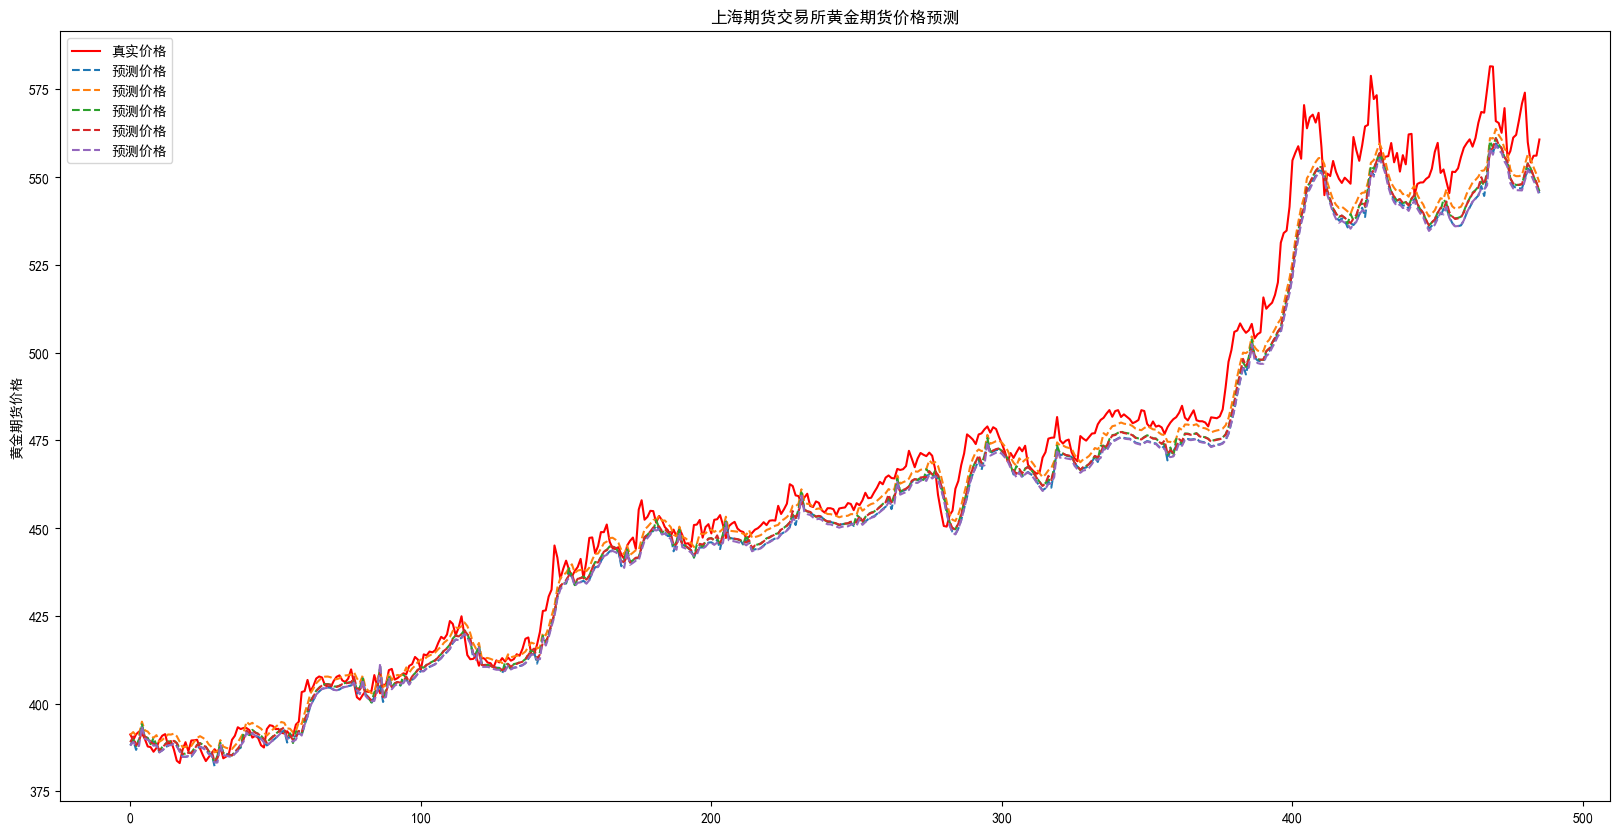

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()